In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from Orange.data import Table
from Orange.classification import NaiveBayesLearner, TreeLearner
from Orange.evaluation import CrossValidation

In [8]:
heart = Table("heart_disease")
print(heart[:5])

[[63, male, typical ang, 145, 233, 1, left vent hypertrophy, 150, 0, 2.3, downsloping, 0, fixed defect | 0],
 [67, male, asymptomatic, 160, 286, 0, left vent hypertrophy, 108, 1, 1.5, flat, 3, normal | 1],
 [67, male, asymptomatic, 120, 229, 0, left vent hypertrophy, 129, 1, 2.6, flat, 2, reversable defect | 1],
 [37, male, non-anginal, 130, 250, 0, normal, 187, 0, 3.5, downsloping, 0, normal | 0],
 [41, female, atypical ang, 130, 204, 0, left vent hypertrophy, 172, 0, 1.4, upsloping, 0, normal | 0]]


In [15]:
scores = CrossValidation(heart, [NaiveBayesLearner(), TreeLearner()])
#take probabilites of class 1 (sick) of NaiveBayesLearner
p1 = scores.probabilities[0][:, 1]
#take actual class values
y = scores.actual
#cost of false positive (patient classified as sick when healthy)
fp_cost = 500
#cost of false negative (patient classified as healthy when sick)
fn_cost = 800

fp = 0
#start with threshold above 1 (no one is sick)
fn = np.sum(y)

In [16]:
ps = []
costs = []
#compute costs of classifying i patients as sick
for i in np.argsort(p1)[::-1]:
   if y[i] == 0:
       fp += 1
   else:
       fn -= 1
   ps.append(p1[i])
   costs.append(fp * fp_cost + fn * fn_cost)

In [4]:
costs = np.array(costs)
#find probability of a patient being sick at lowest cost
print(ps[costs.argmin()])

0.620655


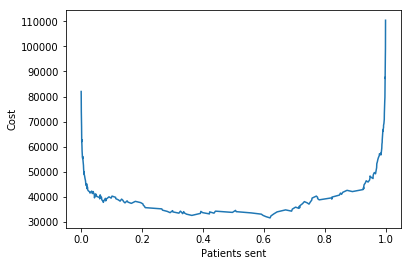

In [31]:
fig, ax = plt.subplots()
plt.plot(ps, costs)
ax.set_xlabel('Patients sent')
ax.set_ylabel('Cost')